In [20]:
import random
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [21]:
dataset = pickle.load(open('./Dataset/dataframe','rb'))

In [22]:
dataset

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48998,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X,Y = dataset.drop('label',axis = 1),dataset['label']
X = X/255.0

In [24]:
X = np.array(X).reshape(X.shape[0],28,28)
Y = keras.utils.to_categorical(Y,num_classes = 10)

In [25]:
X[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


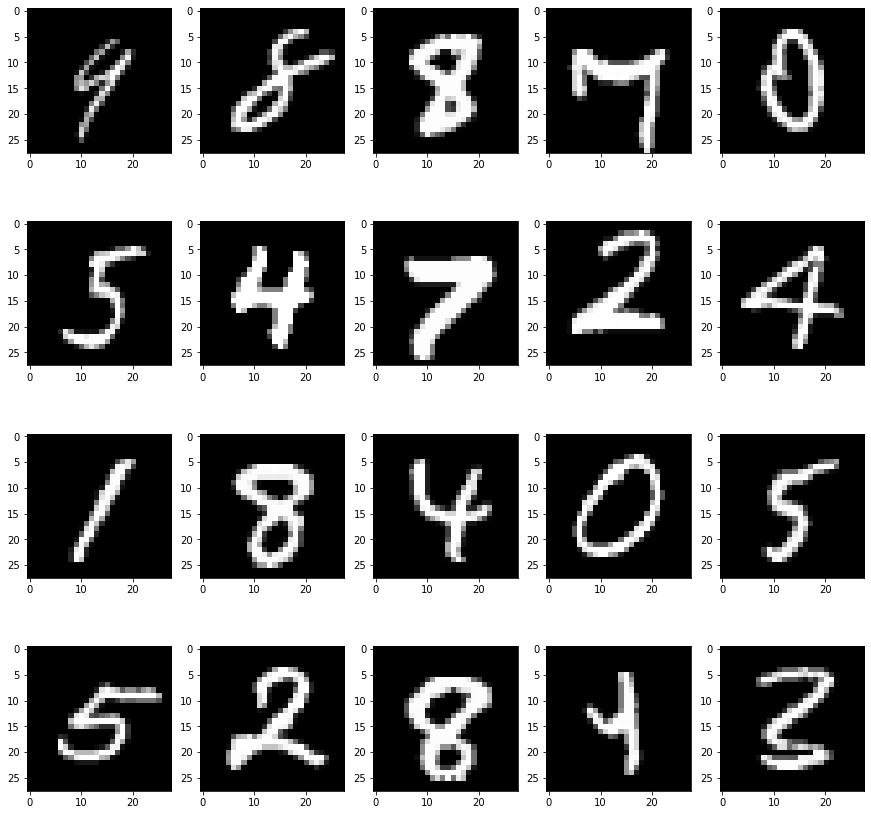

In [26]:
w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 4
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    loc = random.randint(0,len(X)-1)
    plt.imshow(X[loc],cmap = 'gray')
    print(Y[loc])
plt.show()

In [27]:
X = X.reshape(-1,28,28,1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.22)

In [30]:
batch_size = 128
num_classes = 10
epochs = 10

In [31]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',
                              activation = 'relu',input_shape = (28,28,1)))
model.add(keras.layers.Conv2D(filters = 64,kernel_size = (5,5),
                              activation = 'relu'))

model.add(keras.layers.MaxPooling2D((2,2),strides = (1,1),padding = 'same'))

model.add(keras.layers.Conv2D(filters = 32,kernel_size = (3,3),
                             activation = 'relu',padding = 'same'))
model.add(keras.layers.Conv2D(filters = 32,kernel_size = (3,3),
                             activation = 'relu'))

model.add(keras.layers.MaxPooling2D((2,2),padding = 'same'))

model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10,activation = 'softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [32]:
hist = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Train on 38220 samples, validate on 10780 samples
Epoch 1/50
38220/38220 [==============================] - 331s 9ms/sample - loss: 2.2808 - accuracy: 0.1518 - val_loss: 2.2425 - val_accuracy: 0.2670
Epoch 2/50
38220/38220 [==============================] - 316s 8ms/sample - loss: 2.1971 - accuracy: 0.2569 - val_loss: 2.0811 - val_accuracy: 0.5506
Epoch 3/50
38220/38220 [==============================] - 318s 8ms/sample - loss: 1.9744 - accuracy: 0.3881 - val_loss: 1.6660 - val_accuracy: 0.6908
Epoch 4/50
38220/38220 [==============================] - 329s 9ms/sample - loss: 1.6151 - accuracy: 0.4910 - val_loss: 1.1804 - val_accuracy: 0.7493
Epoch 5/50
38220/38220 [==============================] - 335s 9ms/sample - loss: 1.3313 - accuracy: 0.5670 - val_loss: 0.8945 - val_accuracy: 0.7877
Epoch 6/50
38220/38220 [==============================] - 327s 9ms/sample - loss: 1.1406 - accuracy: 0.6263 - val_loss: 0.7338 - val_accuracy: 0.8148
Epoch 7/50
38220/38220 [==========================

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred[0]

array([7.4012666e-03, 5.0494593e-04, 9.5103782e-01, 3.9873883e-02,
       5.5597313e-05, 2.2543471e-04, 5.9269732e-05, 1.3807304e-04,
       6.2769267e-04, 7.5903496e-05], dtype=float32)

In [35]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1574932559329415
Test accuracy: 0.95556587
